In [1063]:
import rebound 

import sympy as sp
from matplotlib import pyplot as plt
from matplotlib import pyplot

import numpy as np

from sympy import init_printing
init_printing()

%matplotlib inline
from sympy import *

import math

In [1064]:
# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = 'whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"] = 0.7

# Predicting an Astrometric signal

In [1237]:
timescale = 3.7
m         = 200
times     = np.linspace(0,timescale,num=m)

# planet parameters 
planet_inc = 0
m_planet   = 0.0143188

# star parameters 
m_star  = 1                                                 # M_sun
v_star  = 4.74*(50*0.001)*(50)* (1/1.496e+8) * (3.154e+7)   # AU/year
#vz_star = 0.1*v_star                                       # AU/year
#z_star  = 50*206265                                        # AU

z_star  = 50*206265   
vz_star = 1.7*v_star 

In [1238]:
sim_wp = rebound.Simulation()                                                              # create a simulation named sim_wp 

sim_wp.units = ["msun","AU","year"]                                                        # setting units of sim_wpm

sim_wp.add(m=1)                                                                            # add the Sun as the central object 

sim_wp.add(m=3.0027e-6, a=1, e=0)                                                          # add Earth in a 1 AU circular orbit 

sim_wp.add(x = 1.031e7, vy=v_star, m = m_star, z = z_star, vz=vz_star)                     # add a star 50 pc away with calculated velocity and set parameters

sim_wp.add(m = m_planet, a = 0.6, e = 0.2, primary = sim_wp.particles[2], inc=planet_inc)  # add planet from figure 3.1 caption and have it orbit the star 

In [1239]:
com_particle = sim_wp.calculate_com(first=2,last=4)

In [1240]:
sim = rebound.Simulation()                          # create a simulation named sim 

sim.units = ["msun","AU","year"]                    # setting units of sim 

sim.add(m=1)                                        # add the Sun as the central object 

sim.add(m=3.0027e-6, a=1, e=0)                      # add Earth in a 1 AU circular orbit 

sim.add(com_particle)                               # add a particle equivaent to the star-planet barycentre

In [1241]:
# positions 
pos_sun   , pos_sun_wp    = np.zeros((m,3)) , np.zeros((m,3))          # sun
pos_earth , pos_earth_wp  = np.zeros((m,3)) , np.zeros((m,3))          # earth 
pos_star  , pos_star_wp   = np.zeros((m,3)) , np.zeros((m,3))          # star 
pos_planet_wp             = np.zeros((m,3))                            # planet 

# center of masses  
sun_earth_com , sun_earth_com_wp = np.zeros((m,3)) , np.zeros((m,3))   # sun and earth center of mass
all_com                          = np.zeros((m,3))                     # center of mass of all objects (with planet)

# r_star - r_earth vector
r_SE, r_SE_wp  = np.zeros((m,3)), np.zeros((m,3))                      # for r_star - r_earth with and without planet

# length of vectors in xy-plane  
r_SE_xy, r_SE_xy_wp = np.zeros((m,1)), np.zeros((m,1))                 # r_star - r_earth with and without planet
r_all_com_xy        = np.zeros((m,1))                                  # for r_com (all objects)

# right ascension and declination
alpha         , delta         = np.empty((m,1)) , np.empty((m,1))      # for r_star - r_earth vector without planet 
alpha_wp      , delta_wp      = np.empty((m,1)) , np.empty((m,1))      # for r_star - r_earth vector with planet 
alpha_all_com , delta_all_com = np.zeros((m,1)) , np.zeros((m,1))      # for r_com (all objects)

In [1242]:
for i,t in enumerate(times):
    sim.integrate(t)
    sim_wp.integrate(t)
    
    # positions of sun, earth and star
    pos_sun[i]   , pos_sun_wp[i]     = sim.particles[0].xyz,   sim_wp.particles[0].xyz
    pos_earth[i] , pos_earth_wp[i]   = sim.particles[1].xyz,   sim_wp.particles[1].xyz
    pos_star[i]  , pos_star_wp[i]    = sim.particles[2].xyz,   sim_wp.particles[2].xyz
    pos_planet_wp[i]                 =                         sim_wp.particles[3].xyz
    
    # centre of mass of sun and earth 
    com_sun_earth   , com_sun_earth_wp    = sim.calculate_com(last=2), sim_wp.calculate_com(last=2)
    sun_earth_com[i], sun_earth_com_wp[i] = com_sun_earth.xyz        , com_sun_earth_wp.xyz
    
    # center of mass of all objects
    com_all    =  sim_wp.calculate_com()
    all_com[i] = com_all.xyz
    
    # creating vectors wrt earth 
    r_SE[i], r_SE_wp[i] = pos_star[i] - pos_earth[i], pos_star_wp[i] - pos_earth_wp[i] # r_star - r_earth

    #length of vectors wrt in the x-y-plane 
    r_SE_xy[i] , r_SE_xy_wp[i]  = np.sqrt(r_SE[i,0]**2 + r_SE[i,1]**2)      , np.sqrt(r_SE_wp[i,0]**2 + r_SE_wp[i,1]**2) # r_star
    r_all_com_xy[i]             = np.sqrt(all_com[i,0]**2+all_com[i,1]**2)  
    
    # calculating RA and Dec in mas
    alpha[i], alpha_wp[i] = np.arctan((r_SE[i,1]/r_SE[i,0]))  * 206264806.24709466, np.arctan((r_SE_wp[i,1]/r_SE_wp[i,0]))  * 206264806.24709466
    delta[i], delta_wp[i] = np.arctan((r_SE[i,2]/r_SE_xy[i])) * 206264806.24709466, np.arctan((r_SE_wp[i,2]/r_SE_xy_wp[i])) * 206264806.24709466
    
    alpha_all_com[i] = np.arctan((all_com[i,1]/all_com[i,0]))      * 206264806.24709466 
    delta_all_com[i] = np.arctan((all_com[i,2]/r_all_com_xy[i,0])) * 206264806.24709466 

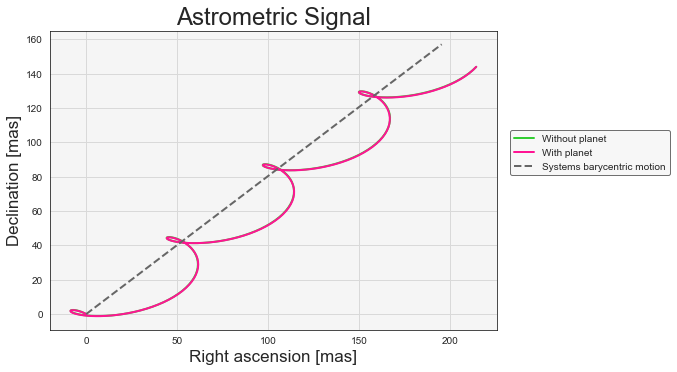

In [1243]:
# plotting data 
plt.plot(alpha,         delta-delta[0],                 color='limegreen',linewidth=2, markersize=12, label='Without planet')
plt.plot(alpha_wp,      delta_wp-delta_wp[0],           color='deeppink', linewidth=2, markersize=12, label='With planet')
plt.plot(alpha_all_com, delta_all_com-delta_all_com[0], color='0.4',      linewidth=2, markersize=12, label='Systems barycentric motion', linestyle='dashed')


#x = np.linspace(0,120,160)
#y = 1.33333*x
#plt.plot(x, y, label='From plot', color='black', linestyle='dashed')
#plt.scatter(29,11,label='2018.4', color='black')
#plt.scatter(60,82,label='2019.6', color='black')
#plt.scatter(80,120,label='2010.8', color='black')

# set titles 
plt.title('Astrometric Signal'     , fontsize = 24)             
plt.xlabel('Right ascension [mas]' , fontsize = 17)                     
plt.ylabel('Declination [mas]'     , fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.4, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

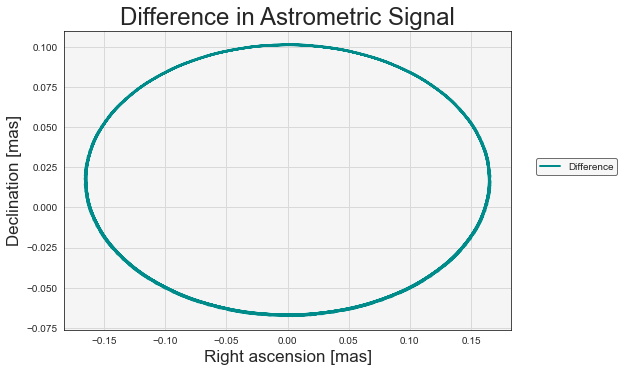

In [1244]:
# plotting data 
plt.plot(alpha-alpha_wp, delta-delta_wp, color='darkcyan',linewidth=2, markersize=12, label='Difference')

# set titles 
plt.title('Difference in Astrometric Signal' , fontsize = 24)             
plt.xlabel('Right ascension [mas]'           , fontsize = 17)                     
plt.ylabel('Declination [mas]'               , fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

# Reproducing astrometric signal using equations 3.22 and 3.23

In [1245]:
M                 = np.zeros((m,1))
E                 = np.zeros((m,1))
X                 = np.zeros((m,1))
Y                 = np.zeros((m,1))
PI                = np.zeros((m,2))
sum_elements      = np.zeros((m,2))
three22           = np.zeros((m,1))
three23           = np.zeros((m,1))
barycentic_motion = np.zeros((m,2))
parallax_motion   = np.zeros((m,2))

In [1246]:
timescale1 = 4.2                                             # timescale                                   [years]
tau        = 0                                               # time of pericentre passage                  [years]
t0         = 0                                               # wrt Julian date                             [years]
times1 = np.linspace(0,timescale1,num=m)

a_AU   = 0.6                                                 # semi-major axis                             [AU]
e      = 0.2                                                 # ellipticity of the orbit                    [unitless]
omega  = 0                                                   # argument of perihelion                      [rad] 
OMEGA  = 0                                                   # longitude of the ascending node             [rad]
i      = planet_inc                                          # orbital inclination                         [rad]

alpha1 = 0.001                                               # randomly chosen                             [rad]
delta1 = -100                                                # randomly chosen                             [rad]

change_RA_0  = 0.120*4.84814e-6*1000                         # change in RA at time t_0                    [as]
change_DEC_0 = 0.160*4.84814e-6*1000                         # change in DEC at time t_0                   [as]

parallax = 1/50                                              # parallax of the system                      [as]

P = a_AU**(3/2)                                              # period of the system                        [years]
a_as = ((parallax*m_planet)**3*(P/(m_star+m_planet))**2)**(1/3) # semi-major axis                          [as]

proper_motion = 0.05                                               
theta         = np.arctan(120/160)                           # angle between prop motion.                  [rad]
prop_RA       = proper_motion*np.sin(theta)/np.cos(delta1)   # proper motion in RA direction               [as/year]
prop_DEC      = proper_motion*np.cos(theta)                  # proper motion in DEC direction              [as/year]

In [1247]:
A = a_as * (  np.cos(omega) * np.cos(OMEGA) - np.sin(omega) * np.sin(OMEGA) * np.cos(i))
B = a_as * (  np.cos(omega) * np.sin(OMEGA) + np.sin(omega) * np.cos(OMEGA) * np.cos(i))
F = a_as * (- np.sin(omega) * np.cos(OMEGA) - np.cos(omega) * np.sin(OMEGA) * np.cos(i))
G = a_as * (- np.sin(omega) * np.sin(OMEGA) + np.cos(omega) * np.cos(OMEGA) * np.cos(i))

#### Calculate:
- mean anomaly $M$ using the equation: $M=\frac{2\pi}{T}(t-\tau)=\frac{2\pi}{a^{3/2}}(t-\tau)$ (Exoplanet handbook 2.9) 
- Eccentric anomaly $E$ using rebound
- elliptical rectangular coordinates  using the equations $X=\cos(E(t))-e$ and $Y=\sqrt{(1-e^2)}\sin(E(t))$ (Exoplanet handbook equations 3.21)
- Orthogonal components of the displacements due to parallax using equation 3.24 from the Exoplanet handbook: $\Pi_{\alpha,t}=r_x(t)\sin\alpha-r_y(t)\cos\alpha$ and $\Pi_{\beta,t}=\left[r_x(t)\cos\alpha+r_y\sin\alpha\right]\sin\delta-r_z(t)\cos\delta$
- the sum part of equations 3.22 and 3.23 from the Exoplanet handbook: $BX_t+GY_t$ and $AX_t+FY_t$

In [1248]:
k = 0
for k, t in enumerate(times1):
    sim_wp.integrate(t)
    r[k] = sim_wp.particles[1].xyz
    M[k] = (2*np.pi/a_AU**(3/2))*(t - tau)
    E[k] = rebound.M_to_E(e,M[k]) 
    X[k] = np.cos(E[k]) - e
    Y[k] = np.sqrt(1-e**2) * np.sin(E[k])
    PI[k,0] =  r[k,0] * np.sin(alpha1) - r[k,1] * np.cos(alpha1)
    PI[k,1] = (r[k,0] * np.cos(alpha1) + r[k,1] * np.sin(alpha1)) * np.sin(delta1) - r[k,2] * np.cos(delta1)
    sum_elements[k,0] = B*X[k] + G*Y[k]
    sum_elements[k,1] = A*X[k] + F*Y[k]
    sum_alpha = np.sum(sum_elements[:,0])
    sum_delta = np.sum(sum_elements[:,1])                 

### The final equations we are calculating are:
- 3.22: $\Delta\alpha(t)\cos\delta=\left[BX_t+GY_t\right]+ \Delta\alpha_0\cos\delta+\varpi\Pi_{\alpha,t}+\mu_\alpha(t-t_0)$
- 3.23: $\Delta\delta(t)=\left[AX_t+F_t\right]+\Delta\delta_0+\varpi\Pi_{\alpha,t}+\mu_\delta(t-t_0)$

In [1249]:
for d,t in enumerate(times1):
    three22[d] = (sum_alpha + change_RA_0 * np.cos(delta1)    + parallax * PI[d,0] + prop_RA  * (t - t0))
    three23[d] = (sum_delta + change_DEC_0                    + parallax * PI[d,1] + prop_DEC * (t - t0))
    
    barycentic_motion[d,0] = (three22[d] - parallax * PI[d,0])*1000                                       
    barycentic_motion[d,1] = (three23[d] - parallax * PI[d,1])*1000                                           
    
    parallax_motion[d,0] = (three22[d] - sum_alpha - change_RA_0  * np.cos(delta1))*1000                     
    parallax_motion[d,1] = (three23[d] - sum_delta - change_DEC_0)*1000                                      

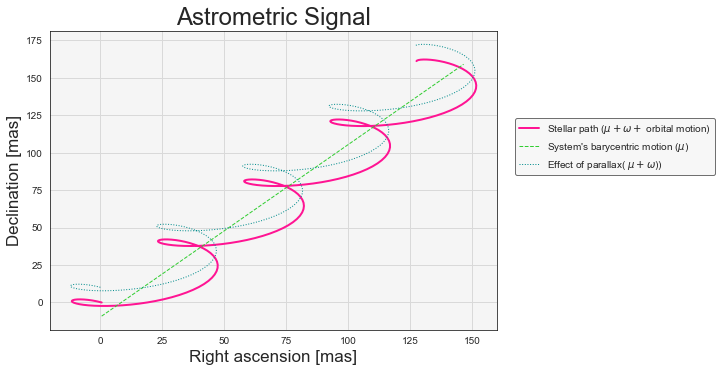

In [1250]:
# plotting data multiplied by 1000 to get it into mas
plt.plot(three22*1000          , (three23-three23[0])*1000          , color='deeppink' , linewidth=2, markersize=12,                     label = 'Stellar path ($\mu + \omega +$ orbital motion)')
plt.plot(barycentic_motion[:,0], barycentic_motion[:,1] , color='limegreen', linewidth=1, markersize=12, linestyle='dashed', label = 'System\'s barycentric motion ($\mu$)')
plt.plot(parallax_motion[:,0]  , parallax_motion[:,1]    , color='darkcyan' , linewidth=1, markersize=12, linestyle='dotted', label = 'Effect of parallax( $\mu + \omega $))')

# set titles 
plt.title('Astrometric Signal'    , fontsize = 24)             
plt.xlabel('Right ascension [mas]', fontsize = 17)                     
plt.ylabel('Declination [mas]'    , fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.5, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

# Comparing methods

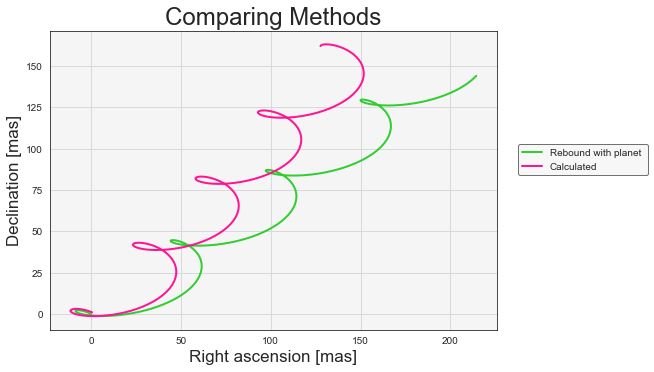

In [1251]:
# plotting data 
plt.plot(alpha_wp, delta_wp-delta_wp[0], color = 'limegreen', linewidth=2, markersize=12, label='Rebound with planet ')
plt.plot(three22*1000, three23*1000    , color = 'deeppink' , linewidth=2, markersize=12, label='Calculated')

# set titles 
plt.title('Comparing Methods'     , fontsize = 24)             
plt.xlabel('Right ascension [mas]', fontsize = 17)                     
plt.ylabel('Declination [mas]'    , fontsize = 17)
  
# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.35, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

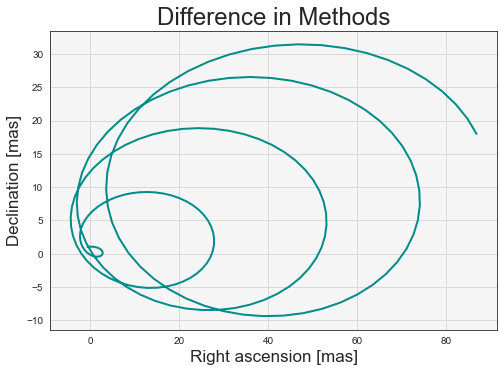

In [1262]:
# plotting data 
plt.plot(-((three22*1000)-alpha_wp), (three23*1000)-(delta_wp-delta_wp[0]), color='darkcyan',linewidth=2, markersize=12)
 
# set titles 
plt.title('Difference in Methods' , fontsize = 24)             
plt.xlabel('Right ascension [mas]', fontsize = 17)                     
plt.ylabel('Declination [mas]'    , fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 